In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from scipy.spatial import procrustes
from scipy.spatial.distance import jensenshannon

In [2]:
plt.style.use('ggplot')

In [3]:
data=pd.read_csv('combined_data_with_loc.csv')
#load feature category mapping
feature_category_dict=json.load(open('feature_category_dict.json'))
data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",geo_lat,geo_lon,cart_x,cart_y
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,-37.775606,144.914871,-4.242641,4.242641e+00
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,-37.779315,144.858155,-9.238795,3.826834e+00
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,-37.570576,144.963028,0.000000,2.700000e+01
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,-37.813411,145.281013,28.000000,1.714506e-15
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,-37.705724,144.963028,0.000000,1.200000e+01


In [4]:
# consider the socio demographic features
curr_feat_name='Socio-demographic'
curr_features=feature_category_dict[curr_feat_name]
curr_data=data[curr_features]
curr_data.head()

,Number of Households,Average persons per household,Occupied private dwellings,"Occupied private dwellings, %",Population in non-private dwellings,Public Housing Dwellings,% dwellings which are public housing,Dwellings with no motor vehicle,"Dwellings with no motor vehicle, %",Dwellings with no internet,...,2nd top industry - persons,"2nd top industry, %",3rd top industry - persons,"3rd top industry, %",Top occupation,"Top occupation, %",2nd top occupation - persons,"2nd top occupation, %",3rd top occupation - persons,"3rd top occupation, %"
0,5546,2.433105,5634,92.269898,72,1467,24.025549,825,13.511300,1062,...,Health Care and Social Assistance,12.028964,Education and Training,10.359096,Professionals,33.146233,Clerical and Administrative Workers,16.484490,Managers,15.051699
1,2994,2.734469,2908,93.806452,<5,1310,42.258065,507,16.354839,820,...,Retail Trade,11.814024,Health Care and Social Assistance,10.213415,Labourers,18.181818,Professionals,16.190834,Clerical and Administrative Workers,13.410969
2,11051,2.964257,10328,93.508375,5,384,3.476686,367,3.322770,1374,...,Retail Trade,10.746229,Health Care and Social Assistance,10.305700,Clerical and Administrative Workers,17.676869,Technicians and Trades Workers,17.450157,Machinery Operators and Drivers,12.475828
3,10020,2.350699,9694,92.996930,439,461,4.422487,716,6.868764,1941,...,Manufacturing,13.063750,Construction,11.153950,Professionals,20.873136,Technicians and Trades Workers,16.828855,Clerical and Administrative Workers,16.802071
4,4552,2.769112,4403,92.325435,262,151,3.166282,534,11.197316,1497,...,Retail Trade,11.680078,Health Care and Social Assistance,8.997805,Professionals,16.739659,Technicians and Trades Workers,15.936740,Clerical and Administrative Workers,14.136253


In [5]:
# consider only the numerical features of the socio demographic features
curr_data_num=curr_data.select_dtypes(include=[np.number])
curr_data_num.head()

,Number of Households,Average persons per household,Occupied private dwellings,"Occupied private dwellings, %",% dwellings which are public housing,"Dwellings with no motor vehicle, %",Dwellings with no internet,"Dwellings with no internet, %",Equivalent household income <$600/week,"Equivalent household income <$600/week, %",...,"Unpaid carer to person with disability, persons","Unpaid carer to person with disability, %","Unpaid carer of children, persons","Unpaid carer of children, %","Top industry, %","2nd top industry, %","3rd top industry, %","Top occupation, %","2nd top occupation, %","3rd top occupation, %"
0,5546,2.433105,5634,92.269898,24.025549,13.511300,1062,17.392728,1604,33.782645,...,1121,11.119929,2735,26.895467,13.122506,12.028964,10.359096,33.146233,16.484490,15.051699
1,2994,2.734469,2908,93.806452,42.258065,16.354839,820,26.451613,1431,61.469072,...,574,10.338617,1436,25.357584,15.891768,11.814024,10.213415,18.181818,16.190834,13.410969
2,11051,2.964257,10328,93.508375,3.476686,3.322770,1374,12.440018,3257,35.969078,...,2474,10.929010,8187,35.815215,18.128421,10.746229,10.305700,17.676869,17.450157,12.475828
3,10020,2.350699,9694,92.996930,4.422487,6.868764,1941,18.620491,3287,38.341304,...,2220,12.183075,5361,29.183451,13.153412,13.063750,11.153950,20.873136,16.828855,16.802071
4,4552,2.769112,4403,92.325435,3.166282,11.197316,1497,31.390229,2230,58.932347,...,1249,13.853150,2243,24.615891,13.679590,11.680078,8.997805,16.739659,15.936740,14.136253


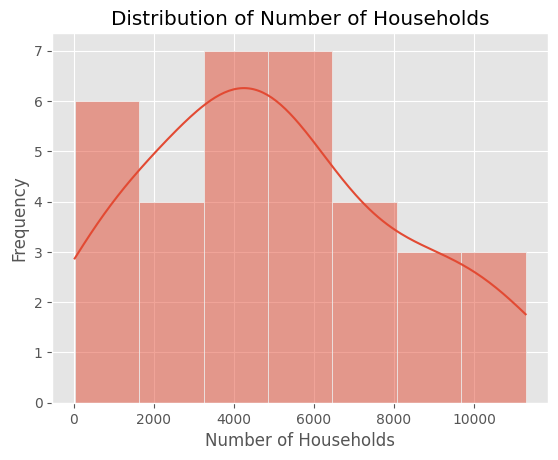

In [6]:
sns.histplot(curr_data['Number of Households'], kde=True)
plt.title('Distribution of Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Frequency')
plt.show()

Spearman correlation between straight line distance from GPO and number of households: -0.18851774204331767


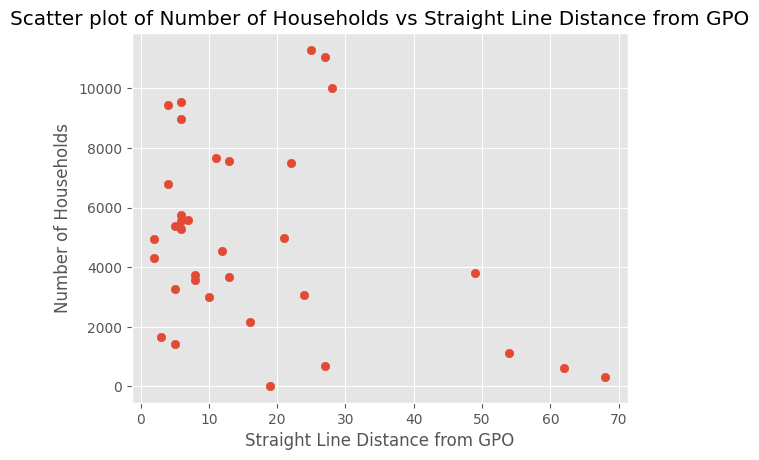

In [7]:
straight_line_dist_gpo=np.sqrt(data['cart_x']**2+data['cart_y']**2)

# find correlation between straight line distance from GPO and number of households
# use spearman correlation from scipy
from scipy.stats import spearmanr
corr=spearmanr(straight_line_dist_gpo, curr_data['Number of Households'])
print('Spearman correlation between straight line distance from GPO and number of households:', corr.correlation)

# do plot
plt.scatter(straight_line_dist_gpo, curr_data['Number of Households'])
plt.xlabel('Straight Line Distance from GPO')
plt.ylabel('Number of Households')

plt.title('Scatter plot of Number of Households vs Straight Line Distance from GPO')
plt.show()

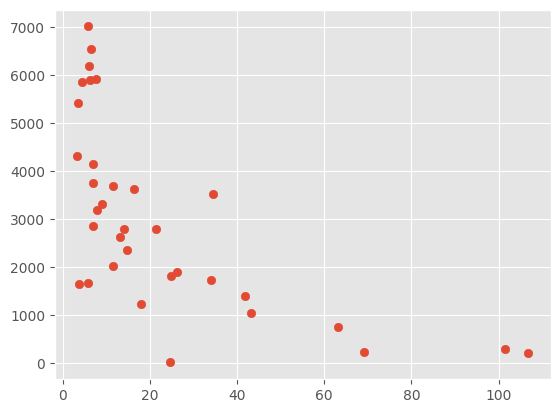

In [8]:
plt.scatter(data['Distance to GPO (km)'], data['Population Density'])

In [9]:
import geopandas as gpd
from shapely.geometry import Point
from esda import Moran
from pysal.lib import weights
from pysal.model.spreg import ML_Lag

# Assuming 'data' has 'Latitude' and 'Longitude' columns to define location
# Replace these with the actual names of your coordinate columns if they differ
data_gpd = data.copy()  # Create a copy of the original DataFrame
data_gpd['geometry'] = data_gpd.apply(lambda row: Point(row['cart_x'], row['cart_y']), axis=1)
data_gpd = gpd.GeoDataFrame(data_gpd, geometry='geometry')

# Create spatial weights matrix using k-nearest neighbors
w = weights.KNN.from_dataframe(data_gpd, k=8)
w.transform = 'R'  # Use uppercase 'R' for row standardization

# Continue with Moran's I and the SAR model
lag_pop_density = weights.lag_spatial(w, data['Population Density'])
moran_pop_density = Moran(data['Population Density'], w)
print("Moran's I for population density:", moran_pop_density.I)

# Define dependent and independent variables
y = data['Distance to GPO (km)'].values.reshape(-1, 1)
X = data[curr_data_num.columns[:4]].values

# Fit a spatial lag model (ML_Lag)
model = ML_Lag(y, X, w=w, name_y='Distance to GPO (km)', name_x=curr_data_num.columns[:4].tolist())
print(model.summary)


Moran's I for population density: 0.47575231846242483
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Distance to GPO (km)                Number of Observations:          34
Mean dependent var  :     22.9717                Number of Variables   :           6
S.D. dependent var  :     26.3343                Degrees of Freedom    :          28
Pseudo R-squared    :      0.9022
Spatial Pseudo R-squared:  0.7904
Log likelihood      :   -123.8211
Sigma-square ML     :     70.1248                Akaike info criterion :     259.642
S.E of regression   :      8.3741                Schwarz criterion     :     268.800

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-

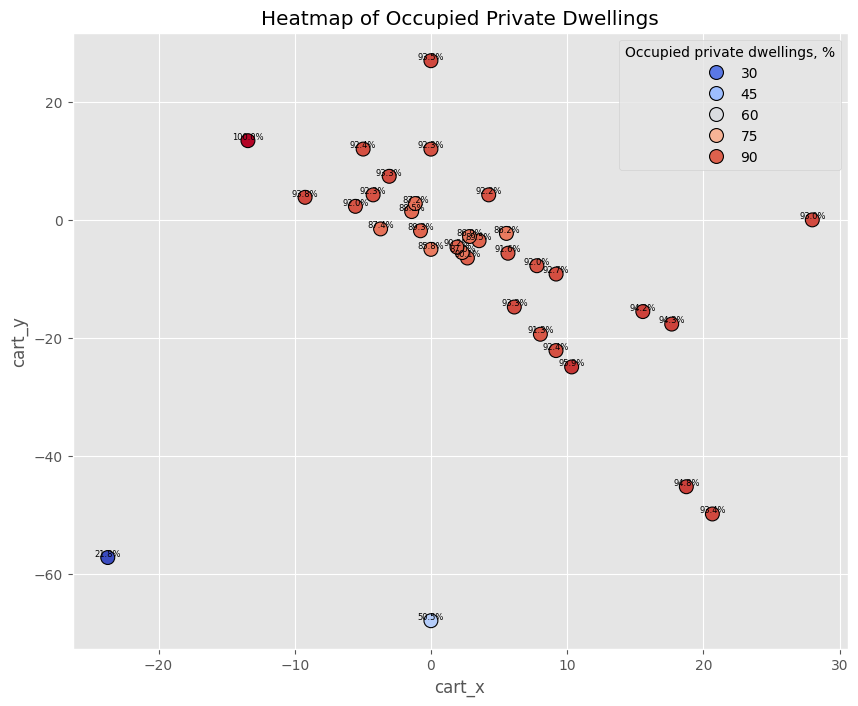

In [10]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='cart_x', y='cart_y', hue='Occupied private dwellings, %', data=data, palette='coolwarm', s=100, edgecolor='k')

# Annotate each point with the percentage
for i in range(data.shape[0]):
	plt.annotate(f"{data['Occupied private dwellings, %'].iloc[i]:.1f}%", 
				 (data['cart_x'].iloc[i], data['cart_y'].iloc[i]), 
				 textcoords="offset points", 
				 xytext=(0,1), 
				 ha='center', fontsize=6)

plt.title('Heatmap of Occupied Private Dwellings')
plt.xlabel('cart_x')
plt.ylabel('cart_y')
plt.show()

In [11]:
import geopandas as gpd
from shapely.geometry import Point
from esda import Moran
from pysal.lib import weights
from pysal.model.spreg import ML_Lag
from sklearn.model_selection import LeaveOneOut

# Assuming 'data' has 'Latitude' and 'Longitude' columns to define location
# Replace these with the actual names of your coordinate columns if they differ
data_gpd = data.copy()  # Create a copy of the original DataFrame
data_gpd['geometry'] = data_gpd.apply(lambda row: Point(row['cart_x'], row['cart_y']), axis=1)
data_gpd = gpd.GeoDataFrame(data_gpd, geometry='geometry')

# Create spatial weights matrix using k-nearest neighbors
w = weights.KNN.from_dataframe(data_gpd, k=8)
# Create LeaveOneOut object
loo = LeaveOneOut()

# Initialize lists to store results
moran_I_values = []
model_summaries = []

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(data_gpd):
	# Split the data
	train_data = data_gpd.iloc[train_index]
	test_data = data_gpd.iloc[test_index]

	# Create spatial weights matrix using k-nearest neighbors for training data
	w_train = weights.KNN.from_dataframe(train_data, k=8)
	w_train.transform = 'R'  # Use uppercase 'R' for row standardization

	# Continue with Moran's I and the SAR model for training data
	lag_pop_density_train = weights.lag_spatial(w_train, train_data['Population Density'])
	moran_pop_density_train = Moran(train_data['Population Density'], w_train)
	moran_I_values.append(moran_pop_density_train.I)

	# Define dependent and independent variables for training data
	y_train = train_data['Distance to GPO (km)'].values.reshape(-1, 1)
	X_train = train_data[curr_data_num.columns[:4]].values

	# Fit a spatial lag model (ML_Lag) for training data
	model_train = ML_Lag(y_train, X_train, w=w_train, name_y='Distance to GPO (km)', name_x=curr_data_num.columns[:4].tolist())
	model_summaries.append(model_train.summary)

# Print results
print("Moran's I values for each leave-one-out iteration:", moran_I_values)
print("Model summaries for each leave-one-out iteration:", model_summaries)

# Continue with Moran's I and the SAR model
lag_pop_density = weights.lag_spatial(w, data['Population Density'])
moran_pop_density = Moran(data['Population Density'], w)
print("Moran's I for population density:", moran_pop_density.I)

# Define dependent and independent variables
y = data['Distance to GPO (km)'].values.reshape(-1, 1)
X = data[curr_data_num.columns[:4]].values

# Fit a spatial lag model (ML_Lag)
model = ML_Lag(y, X, w=w, name_y='Distance to GPO (km)', name_x=curr_data_num.columns[:4].tolist())
print(model.summary)


Moran's I values for each leave-one-out iteration: [np.float64(0.49081814767574966), np.float64(0.4758371853182749), np.float64(0.4721365509860188), np.float64(0.48211496685537597), np.float64(0.47598244845497223), np.float64(0.4805223015021558), np.float64(0.4777586217286639), np.float64(0.46519100083737164), np.float64(0.44721164210177233), np.float64(0.4862604848497211), np.float64(0.4533262421517186), np.float64(0.45178117376227606), np.float64(0.43851300691548784), np.float64(0.45857231704874535), np.float64(0.47376382392764926), np.float64(0.513402722015654), np.float64(0.47722415231396753), np.float64(0.4955425180565708), np.float64(0.488683854563157), np.float64(0.5084578298745055), np.float64(0.4153104450190932), np.float64(0.43939757649516387), np.float64(0.45881511334137914), np.float64(0.44769018967919244), np.float64(0.4102880736967222), np.float64(0.43877546541968737), np.float64(0.4292183096560456), np.float64(0.4276313182044245), np.float64(0.4195865347645906), np.float

In [12]:
print("\n".join(model_summaries))

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Distance to GPO (km)                Number of Observations:          33
Mean dependent var  :     23.4569                Number of Variables   :           6
S.D. dependent var  :     26.5878                Degrees of Freedom    :          27
Pseudo R-squared    :      0.9003
Spatial Pseudo R-squared:  0.8120
Log likelihood      :   -120.7514
Sigma-square ML     :     72.8621                Akaike info criterion :     253.503
S.E of regression   :      8.5359                Schwarz criterion     :     262.482

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-------------------------------------------------------

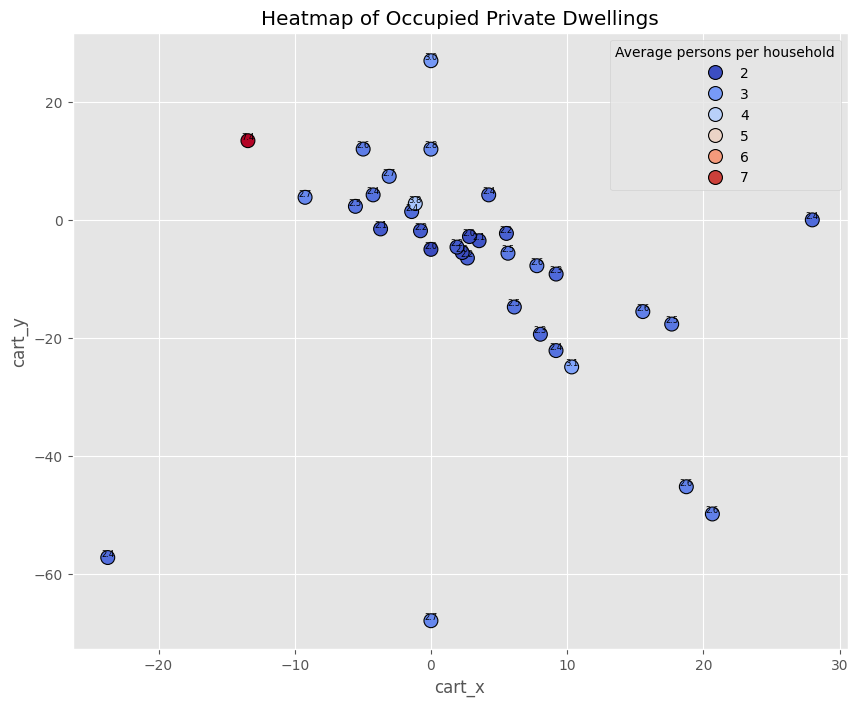

In [13]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='cart_x', y='cart_y', hue='Average persons per household', data=data, palette='coolwarm', s=100, edgecolor='k')

# Annotate each point with the percentage
for i in range(data.shape[0]):
	plt.annotate(f"{data['Average persons per household'].iloc[i]:.1f}", 
				 (data['cart_x'].iloc[i], data['cart_y'].iloc[i]), 
				 textcoords="offset points", 
				 xytext=(0,1), 
				 ha='center', fontsize=6)

plt.title('Heatmap of Occupied Private Dwellings')
plt.xlabel('cart_x')
plt.ylabel('cart_y')
plt.show()

In [14]:
import geopandas as gpd
from shapely.geometry import Point
from esda import Moran
from pysal.lib import weights
from pysal.model.spreg import ML_Lag

# Assuming 'data' has 'Latitude' and 'Longitude' columns to define location
# Replace these with the actual names of your coordinate columns if they differ
data_gpd = data.copy()  # Create a copy of the original DataFrame
data_gpd['geometry'] = data_gpd.apply(lambda row: Point(row['cart_x'], row['cart_y']), axis=1)
data_gpd = gpd.GeoDataFrame(data_gpd, geometry='geometry')

# Create spatial weights matrix using k-nearest neighbors
w = weights.KNN.from_dataframe(data_gpd, k=8)
w.transform = 'R'  # Use uppercase 'R' for row standardization

# Continue with Moran's I and the SAR model
lag_pop_density = weights.lag_spatial(w, data['IRSD (min)'])
moran_pop_density = Moran(data['Distance to GPO (km)'], w)
print("Moran's I for IRSD (min):", moran_pop_density.I)
# print p-value
print("p-value:", moran_pop_density.p_sim)

# Define dependent and independent variables
y = data['Distance to GPO (km)'].values.reshape(-1, 1)
X = data[['IRSD (min)', 'IRSD (avg)', 'IRSD (max)']].values

# Fit a spatial lag model (ML_Lag)
model = ML_Lag(y, X, w=w, name_y='Distance to GPO (km)', name_x=['IRSD (min)', 'IRSD (avg)', 'IRSD (max)'])
print(model.summary)


Moran's I for IRSD (min): 0.4322190188078227
p-value: 0.001
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Distance to GPO (km)                Number of Observations:          34
Mean dependent var  :     22.9717                Number of Variables   :           5
S.D. dependent var  :     26.3343                Degrees of Freedom    :          29
Pseudo R-squared    :      0.7834
Spatial Pseudo R-squared:  0.6129
Log likelihood      :   -140.6109
Sigma-square ML     :    190.3946                Akaike info criterion :     291.222
S.E of regression   :     13.7984                Schwarz criterion     :     298.854

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probabi

In [15]:
data_gpd = data.copy()  # Create a copy of the original DataFrame
data_gpd['geometry'] = data_gpd.apply(lambda row: Point(row['cart_x'], row['cart_y']), axis=1)
data_gpd = gpd.GeoDataFrame(data_gpd, geometry='geometry')

# Create spatial weights matrix using k-nearest neighbors
w = weights.KNN.from_dataframe(data_gpd, k=8)
w.transform = 'R'  # Use uppercase 'R' for row standardization

# Continue with Moran's I and the SAR model
lag_pop_density = weights.lag_spatial(w, data['Equivalent household income <$600/week, %'])
moran_pop_density = Moran(data['Equivalent household income <$600/week, %'], w, permutations=9999)
print("Moran's I for Equivalent household income <$600/week, %:", moran_pop_density.I)
# print p-value
print("p-value:", moran_pop_density.p_sim)

# Define dependent and independent variables
y = data['Distance to GPO (km)'].values.reshape(-1, 1)
X = data[['Equivalent household income <$600/week, %']].values

# Fit a spatial lag model (ML_Lag)
model = ML_Lag(y, X, w=w, name_y='Distance to GPO (km)', name_x=['Equivalent household income <$600/week, %'])
print(model.summary)


Moran's I for Equivalent household income <$600/week, %: 0.3144429431908387
p-value: 0.0002
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Distance to GPO (km)                Number of Observations:          34
Mean dependent var  :     22.9717                Number of Variables   :           3
S.D. dependent var  :     26.3343                Degrees of Freedom    :          31
Pseudo R-squared    :      0.8255
Spatial Pseudo R-squared:  0.0439
Log likelihood      :   -144.8534
Sigma-square ML     :    244.4849                Akaike info criterion :     295.707
S.E of regression   :     15.6360                Schwarz criterion     :     300.286

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.E

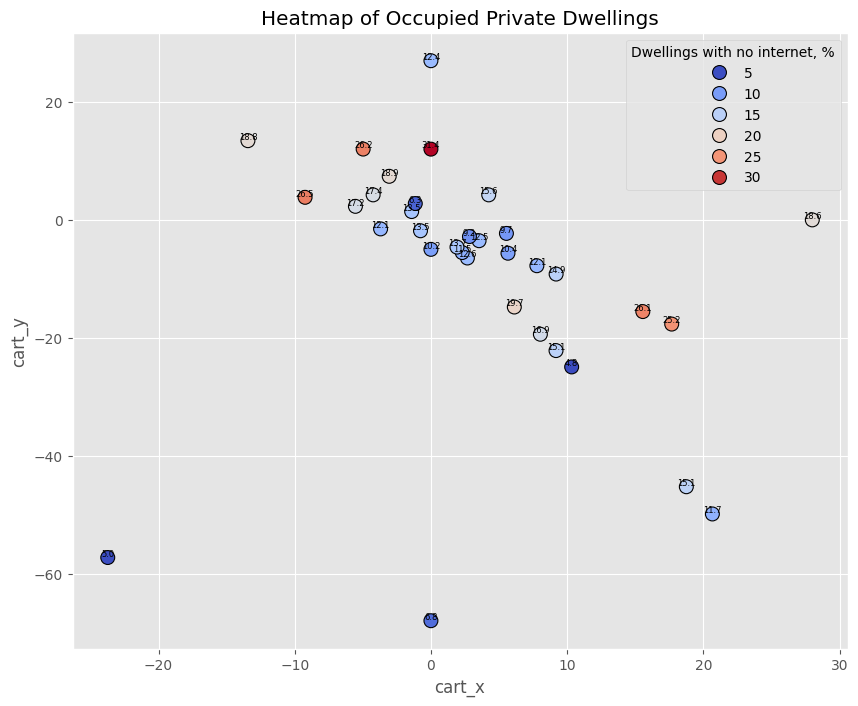

In [16]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='cart_x', y='cart_y', hue='Dwellings with no internet, %', data=data, palette='coolwarm', s=100, edgecolor='k')

# Annotate each point with the percentage
for i in range(data.shape[0]):
	plt.annotate(f"{data['Dwellings with no internet, %'].iloc[i]:.1f}", 
				 (data['cart_x'].iloc[i], data['cart_y'].iloc[i]), 
				 textcoords="offset points", 
				 xytext=(0,1), 
				 ha='center', fontsize=6)

plt.title('Heatmap of Occupied Private Dwellings')
plt.xlabel('cart_x')
plt.ylabel('cart_y')
plt.show()

In [17]:
curr_feat_name='Hospital'
curr_features=feature_category_dict[curr_feat_name]
curr_data=data[curr_features]

In [18]:
data_gpd = data.copy()  # Create a copy of the original DataFrame
data_gpd['geometry'] = data_gpd.apply(lambda row: Point(row['cart_x'], row['cart_y']), axis=1)
data_gpd = gpd.GeoDataFrame(data_gpd, geometry='geometry')

# Create spatial weights matrix using k-nearest neighbors
w = weights.KNN.from_dataframe(data_gpd, k=8)
w.transform = 'R'  # Use uppercase 'R' for row standardization

# Continue with Moran's I and the SAR model
lag_pop_density = weights.lag_spatial(w, data['Presentations to emergency departments due to injury, %'])
moran_pop_density = Moran(data['Presentations to emergency departments due to injury, %'], w, permutations=9999)
print("Moran's I for Presentations to emergency departments due to injury, %:", moran_pop_density.I)
# print p-value
print("p-value:", moran_pop_density.p_sim)

# Define dependent and independent variables
y = data['Distance to GPO (km)'].values.reshape(-1, 1)
X = data[['Presentations to emergency departments due to injury, %','Category 4 & 5 emergency department presentations, %']].values

# Fit a spatial lag model (ML_Lag)
model = ML_Lag(y, X, w=w, name_y='Distance to GPO (km)', name_x=['Presentations to emergency departments due to injury, %','Category 4 & 5 emergency department presentations, %'])
print(model.summary)


Moran's I for Presentations to emergency departments due to injury, %: 0.5832636049850872
p-value: 0.0001
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Distance to GPO (km)                Number of Observations:          34
Mean dependent var  :     22.9717                Number of Variables   :           4
S.D. dependent var  :     26.3343                Degrees of Freedom    :          30
Pseudo R-squared    :      0.7939
Spatial Pseudo R-squared:  0.7705
Log likelihood      :   -134.8289
Sigma-square ML     :    142.4311                Akaike info criterion :     277.658
S.E of regression   :     11.9345                Schwarz criterion     :     283.763

------------------------------------------------------------------------------------
            Variable     Coefficie

Text(0.5, 1.0, 'Scatter plot of Distance to GPO (km) vs Category 4 & 5 emergency department presentations, %')

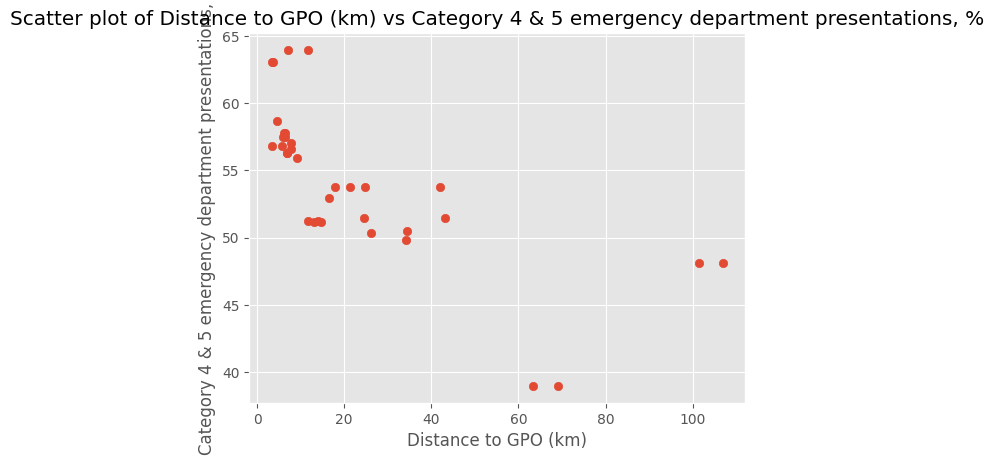

In [19]:
# do a distance vs 'Category 4 & 5 emergency department presentations, %' scatter plot
plt.scatter(data['Distance to GPO (km)'], data['Category 4 & 5 emergency department presentations, %'])
plt.xlabel('Distance to GPO (km)')
plt.ylabel('Category 4 & 5 emergency department presentations, %')
plt.title('Scatter plot of Distance to GPO (km) vs Category 4 & 5 emergency department presentations, %')


In [20]:
data_gpd = data.copy()  # Create a copy of the original DataFrame
data_gpd['geometry'] = data_gpd.apply(lambda row: Point(row['cart_x'], row['cart_y']), axis=1)
data_gpd = gpd.GeoDataFrame(data_gpd, geometry='geometry')

# Create spatial weights matrix using k-nearest neighbors
w = weights.KNN.from_dataframe(data_gpd, k=8)
w.transform = 'R'  # Use uppercase 'R' for row standardization

# Continue with Moran's I and the SAR model
lag_pop_density = weights.lag_spatial(w, data['Travel time to nearest public hospital'])
moran_pop_density = Moran(data['Travel time to nearest public hospital'], w, permutations=9999)
print("Moran's I for Travel time to nearest public hospital:", moran_pop_density.I)
# print p-value
print("p-value:", moran_pop_density.p_sim)

# Define dependent and independent variables
y = data['Travel time to nearest public hospital'].values.reshape(-1, 1)
X = data[['Distance to GPO (km)']].values

# Fit a spatial lag model (ML_Lag)
model = ML_Lag(y, X, w=w, name_y='Travel time to nearest public hospital', name_x=['Distance to GPO (km)'])
print(model.summary)


Moran's I for Travel time to nearest public hospital: 0.2946216402021882
p-value: 0.0005
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Travel time to nearest public hospital                Number of Observations:          34
Mean dependent var  :      6.8966                Number of Variables   :           3
S.D. dependent var  :      3.7968                Degrees of Freedom    :          31
Pseudo R-squared    :      0.6712
Spatial Pseudo R-squared:  0.6339
Log likelihood      :    -74.6699
Sigma-square ML     :      4.6022                Akaike info criterion :     155.340
S.E of regression   :      2.1453                Schwarz criterion     :     159.919

------------------------------------------------------------------------------------
            Variable     Coeffici

In [21]:
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import geopandas as gpd

# Create a DataFrame with Population Density and coordinates
df = pd.DataFrame({
    'Population Density': data_gpd['Population Density'],
    'X': data_gpd.geometry.x,
    'Y': data_gpd.geometry.y
})

# Define response variable (y) and predictors (X)
y = np.array(df['Population Density']).reshape(-1, 1)
X = np.array(df[['X', 'Y']])

# Select bandwidth for GWR, using a smaller max_neighbors parameter
coords = np.array(list(zip(df['X'], df['Y'])))
selector = Sel_BW(coords, y, X)
# Specify a smaller bandwidth manually, e.g., 10
bw = 8  # Choose an appropriate smaller value based on your data size
gwr_model = GWR(coords, y, X, bw)
gwr_results = gwr_model.fit()
print(gwr_results.summary())







Model type                                                         Gaussian
Number of observations:                                                  34
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       112910429.155
Log-likelihood:                                                    -303.512
AIC:                                                                613.023
AICc:                                                               616.402
BIC:                                                           112910319.838
R2:                                                                   0.137
Adj. R2:                                                              0.082

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ----

In [22]:
print(gwr_results.summary.__doc__)


        Print out GWR summary

        Parameters
        ----------
        as_str        : bool
                        optional parameters to specify that summary results
                        should be returned as str and not printed to stdout

        Returns
        -------

        summary        : Optional[str]
                        optional GWR summary string if `as_str` is True
        


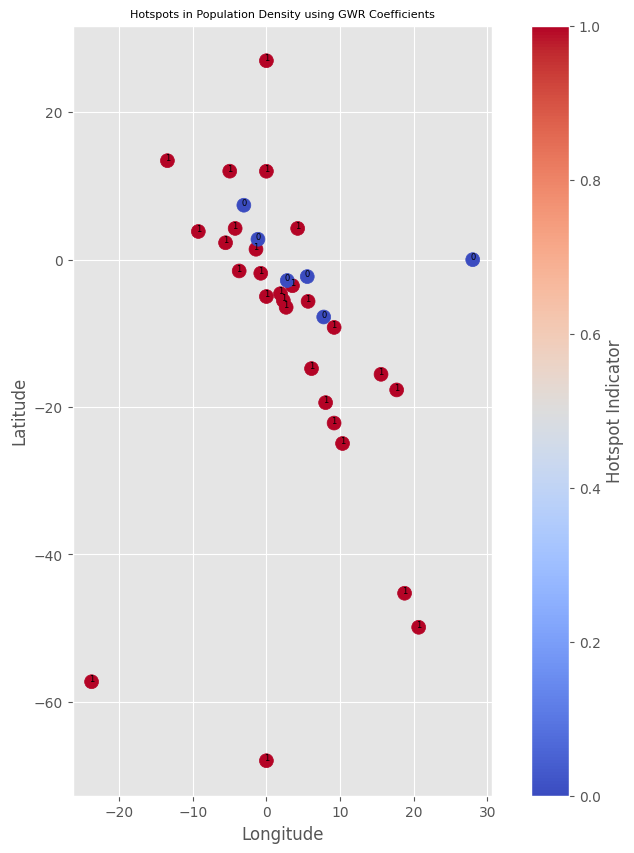

In [23]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Extract local coefficients from the GWR results
# Convert coefficients to a DataFrame
gwr_params = pd.DataFrame(gwr_results.params, columns=['Intercept', 'X_Coeff', 'Y_Coeff'])

# Step 2: Define a threshold for hotspots (e.g., mean of the coefficients)
x_threshold = gwr_params['X_Coeff'].mean()
y_threshold = gwr_params['Y_Coeff'].mean()

# Step 3: Identify hotspots - points where coefficients exceed thresholds
hotspots = gwr_params[(gwr_params['X_Coeff'] >= x_threshold) | (gwr_params['Y_Coeff'] >= y_threshold)]
df['hotspot'] = ((gwr_params['X_Coeff'] >= x_threshold) | (gwr_params['Y_Coeff'] >= y_threshold)).astype(int)

# Step 4: Plot the hotspots on a map using GeoPandas
# Merge hotspots data back with the original GeoDataFrame
data_gpd['hotspot'] = df['hotspot']

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
data_gpd.plot(column='hotspot', cmap='coolwarm', markersize=100, legend=True, ax=ax,
              legend_kwds={'label': "Hotspot Indicator", 'orientation': "vertical"})

# annotate each point with the hotspot indicator
for i in range(data_gpd.shape[0]):
	plt.annotate(f"{data_gpd['hotspot'].iloc[i]}", 
				 (data_gpd['cart_x'].iloc[i], data_gpd['cart_y'].iloc[i]), 
				 textcoords="offset points", 
				 xytext=(0,0), 
				 ha='center', fontsize=6)
	

# Customize plot aesthetics
ax.set_title('Hotspots in Population Density using GWR Coefficients', fontsize=8)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


In [24]:
gwr_params

,Intercept,X_Coeff,Y_Coeff
0,3551.950485,111.073690,22.434507
1,3725.487819,231.250523,132.438259
2,4434.166662,176.914332,-126.547189
3,3516.167438,-63.789675,-16.277894
4,4026.538734,44.837050,-113.852119
5,3500.695026,228.269778,223.975103
6,5062.720022,132.589699,-185.508795
7,4692.656241,-597.754802,-425.873602
8,8237.984222,-771.068832,1.366662
9,4796.176373,240.121578,-115.517908


In [25]:
x_threshold, y_threshold

(np.float64(-11.849849699020425), np.float64(-14.474873703417087))

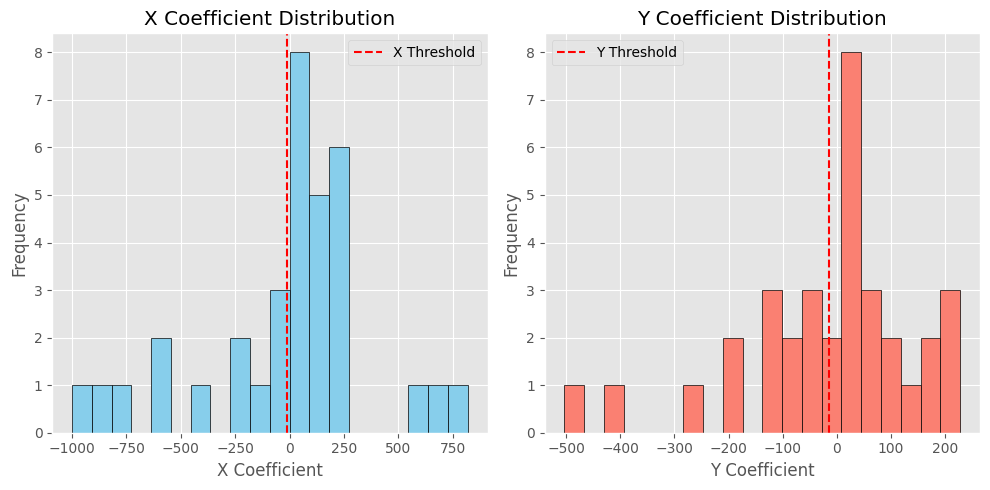

In [26]:
# plot parameter distributions
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(gwr_params['X_Coeff'], bins=20, color='skyblue', edgecolor='black')
ax[0].axvline(x=x_threshold, color='red', linestyle='--', label='X Threshold')
ax[0].set_title('X Coefficient Distribution')
ax[0].set_xlabel('X Coefficient')
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].hist(gwr_params['Y_Coeff'], bins=20, color='salmon', edgecolor='black')
ax[1].axvline(x=y_threshold, color='red', linestyle='--', label='Y Threshold')
ax[1].set_title('Y Coefficient Distribution')
ax[1].set_xlabel('Y Coefficient')
ax[1].set_ylabel('Frequency')
ax[1].legend()

plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Sample data_test: assume 'data_test' is a DataFrame with individual and school-level data_test
# Columns: 'score' (student test score), 'student_age' (individual predictor),
#          'school_size' (school-level predictor), and 'school_id' (school identifier)

# Load or create your data_test
data_test = pd.DataFrame({
    'score': [88, 75, 92, 85, 76, 91, 89, 84, 73, 77],  # Example scores
    'student_age': [15, 14, 15, 16, 15, 14, 16, 17, 14, 15],  # Student ages
    'school_size': [500, 500, 1000, 1000, 1000, 500, 500, 500, 1000, 1000],  # School size
    'school_id': [1, 1, 2, 2, 2, 1, 1, 1, 2, 2]  # School identifiers
})

# Define the multilevel model
# Random intercepts model with 'school_id' as the grouping variable
model = smf.mixedlm("score ~ student_age + school_size", 
                    data_test, 
                    groups=data_test["school_id"])

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())


from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
predictors = data_test[['student_age', 'school_size']]
vif = pd.DataFrame()
vif["Variable"] = predictors.columns
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
print(vif)



         Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: score   
No. Observations:   10      Method:             REML    
No. Groups:         2       Scale:              52.4571 
Min. group size:    5       Log-Likelihood:     -32.7040
Max. group size:    5       Converged:          Yes     
Mean group size:    5.0                                 
--------------------------------------------------------
            Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept   59.400   41.575  1.429 0.153 -22.085 140.885
student_age  2.000    2.442  0.819 0.413  -2.785   6.785
school_size -0.009    0.022 -0.392 0.695  -0.053   0.035
Group Var   52.457                                      

      Variable       VIF
0  student_age  9.306391
1  school_size  9.306391


c:\Users\subha\miniconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [28]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pysal.lib import weights
from pysal.model.spreg import ML_Lag


# Assuming 'data' has 'Latitude' and 'Longitude' columns to define location
# Replace these with the actual names of your coordinate columns if they differ
data_gpd = data.copy()  # Create a copy of the original DataFrame
data_gpd['geometry'] = data_gpd.apply(lambda row: Point(row['cart_x'], row['cart_y']), axis=1)
data_gpd = gpd.GeoDataFrame(data_gpd, geometry='geometry')

# Create spatial weights matrix using k-nearest neighbors
w = weights.KNN.from_dataframe(data_gpd, k=8)
w.transform = 'R'  # Use uppercase 'R' for row standardization

# Define dependent and independent variables
y = data['Distance to GPO (km)'].values.reshape(-1, 1)
X = data[curr_data_num.columns[:4]].values

# Fit a spatial lag model (ML_Lag)
model = ML_Lag(y, X, w=w, name_y='Distance to GPO (km)', name_x=curr_data_num.columns[:4].tolist())
print(model.summary)
import statsmodels.formula.api as smf

# Create a DataFrame with the dependent and independent variables
df = pd.DataFrame({
	'Distance_to_GPO': y.flatten(),
	'Number_of_Households': X[:, 0],
	'Average_persons_per_household': X[:, 1],
	'Occupied_private_dwellings': X[:, 2],
	'Occupied_private_dwellings_percent': X[:, 3],
	'Region': data['Region']  # Assuming 'Region' is a categorical variable in the original data
})

# Fit a mixed linear model with 'Region' as the grouping variable
model = smf.mixedlm("Distance_to_GPO ~ Number_of_Households + Average_persons_per_household + Occupied_private_dwellings + Occupied_private_dwellings_percent", 
					df, 
					groups=df["Region"])

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Distance to GPO (km)                Number of Observations:          34
Mean dependent var  :     22.9717                Number of Variables   :           6
S.D. dependent var  :     26.3343                Degrees of Freedom    :          28
Pseudo R-squared    :      0.9022
Spatial Pseudo R-squared:  0.7904
Log likelihood      :   -123.8211
Sigma-square ML     :     70.1248                Akaike info criterion :     259.642
S.E of regression   :      8.3741                Schwarz criterion     :     268.800

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-------------------------------------------------------

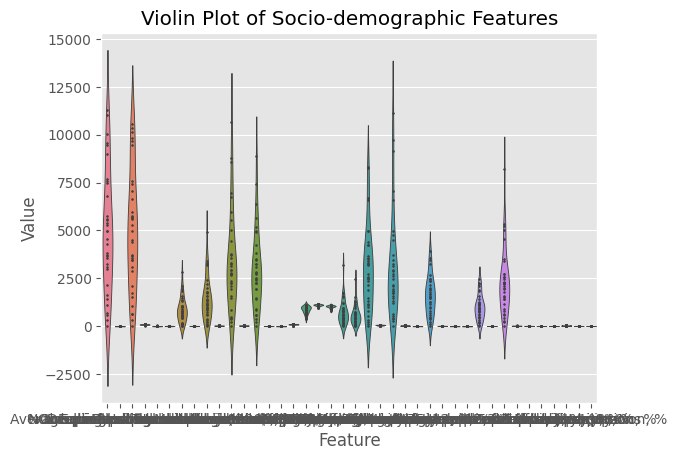

In [29]:
# do a violin plot of 'Socio-demographic' features
sns.violinplot(data=curr_data_num, inner='point')
plt.title('Violin Plot of Socio-demographic Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

In [30]:
import pandas as pd
import statsmodels.formula.api as smf

# Sample data for illustration
data_test = pd.DataFrame({
    'score': [88, 75, 92, 85, 76, 91, 89, 84, 73, 77],
    'student_age': [15, 14, 15, 16, 15, 14, 16, 17, 14, 15],
    'school_size': [500, 500, 1000, 1000, 1000, 500, 500, 500, 1000, 1000],
    'individual_id': range(10)  # Assume each student has a unique ID
})

# Define a nested multilevel model
# Using `student_age` as a higher-level group and nesting `individual_id` within it
model = smf.mixedlm("score ~ school_size", 
                    data_test, 
                    groups=data_test["student_age"],
                    re_formula="~1",  
                    vc_formula={"individual_id": "0 + C(individual_id)"})  # Variance components for individuals

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())


            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   score   
No. Observations:    10        Method:               REML    
No. Groups:          4         Scale:                16.6663 
Min. group size:     1         Log-Likelihood:       -34.8476
Max. group size:     4         Converged:            Yes     
Mean group size:     2.5                                     
-------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025  0.975]
-------------------------------------------------------------
Intercept         90.200    7.092 12.718 0.000 76.299 104.101
school_size       -0.010    0.009 -1.070 0.285 -0.027   0.008
Group Var          0.000                                     
individual_id Var 33.634                                     



c:\Users\subha\miniconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [31]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.spatial import distance_matrix

# Sample data
data_test = pd.DataFrame({
    'score': [88, 75, 92, 85, 76, 91, 89, 84, 73, 77],
    'student_age': [15, 14, 15, 16, 15, 14, 16, 17, 14, 15],
    'school_size': [500, 500, 1000, 1000, 1000, 500, 500, 500, 1000, 1000],
    'individual_id': range(10),  # Unique ID for each student
    'x_coord': np.random.rand(10),  # Example spatial coordinates (x)
    'y_coord': np.random.rand(10)   # Example spatial coordinates (y)
})

# Step 1: Define spatial weight matrix based on coordinates
coords = data_test[['x_coord', 'y_coord']]
distances = distance_matrix(coords, coords)
sigma = 1.0  # Define a distance decay factor for the weight matrix
W = np.exp(-distances / sigma)  # Gaussian distance decay function
np.fill_diagonal(W, 0)  # Set self-weights to zero

# Step 2: Calculate the spatial lag of the 'score' variable
data_test['spatial_lag_score'] = W.dot(data_test['score'])

# Step 3: Define and fit the nested multilevel model with spatial lag
model = smf.mixedlm("score ~ school_size + spatial_lag_score", 
                    data_test, 
                    groups=data_test["student_age"],
                    re_formula="~1",
                    vc_formula={"individual_id": "0 + C(individual_id)"})  # Variance components for individuals

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())


            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   score   
No. Observations:    10        Method:               REML    
No. Groups:          4         Scale:                17.6557 
Min. group size:     1         Log-Likelihood:       -36.7388
Max. group size:     4         Converged:            Yes     
Mean group size:     2.5                                     
-------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025  0.975]
-------------------------------------------------------------
Intercept         79.622   23.791  3.347 0.001 32.991 126.252
school_size       -0.011    0.010 -1.114 0.265 -0.031   0.008
spatial_lag_score  0.026    0.055  0.468 0.640 -0.082   0.134
Group Var          0.000                                     
individual_id Var 38.084                                     



c:\Users\subha\miniconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\subha\miniconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


# Hospital stuff only

In [32]:
hosp_data=curr_data.copy()
hosp_data_num=hosp_data.select_dtypes(include=[np.number])
hosp_data.head()

,"Public hospital separations, 2012-13",Nearest Public Hospital,Travel time to nearest public hospital,Distance to nearest public hospital,"Obstetric type separations, 2012-13",Nearest public hospital with maternity services,Time to nearest public hospital with maternity services,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %"
0,2701.557647,Western Hospital (Footscray),5.254528,3.876415,215.5550042481527,Royal Women's Hospital,6.490453,4.912570,3313.052180,Royal Melbourne Hospital,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032
1,2964.691696,Western Hospital (Footscray),5.028871,3.875731,189.98005347998108,Sunshine Hospital,8.071881,6.216803,2632.949379,Royal Melbourne Hospital,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428
2,9644.630863,Craigieburn Health Service,7.280902,7.277191,918.9149121263106,The Northern Hospital,11.570855,15.213189,9915.723721,The Northern Hospital,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988
3,5781.347185,Maroondah Hospital,5.093285,3.601752,317.51605093008055,Yarra Ranges Health,10.683462,9.413847,6149.574954,Maroondah Hospital,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026
4,4694.587633,Broadmeadows Health Service,8.910941,6.645261,287.0439496672183,The Northern Hospital,11.510757,12.004044,3799.030890,The Northern Hospital,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315


Correlation between Population Density and Public hospital separations, 2012-13: 0.1065437655533571


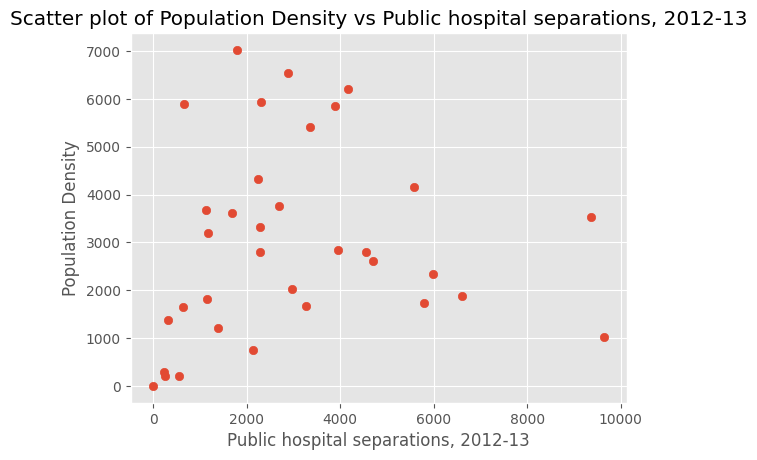

In [33]:
# compute correlation between 'Population Density' and 'Public hospital separations, 2012-13'
corr=hosp_data_num['Public hospital separations, 2012-13'].corr(data['Population Density'])
print('Correlation between Population Density and Public hospital separations, 2012-13:', corr)
plt.scatter(hosp_data_num['Public hospital separations, 2012-13'], data['Population Density'])
plt.xlabel('Public hospital separations, 2012-13')
plt.ylabel('Population Density')
plt.title('Scatter plot of Population Density vs Public hospital separations, 2012-13')
plt.show()

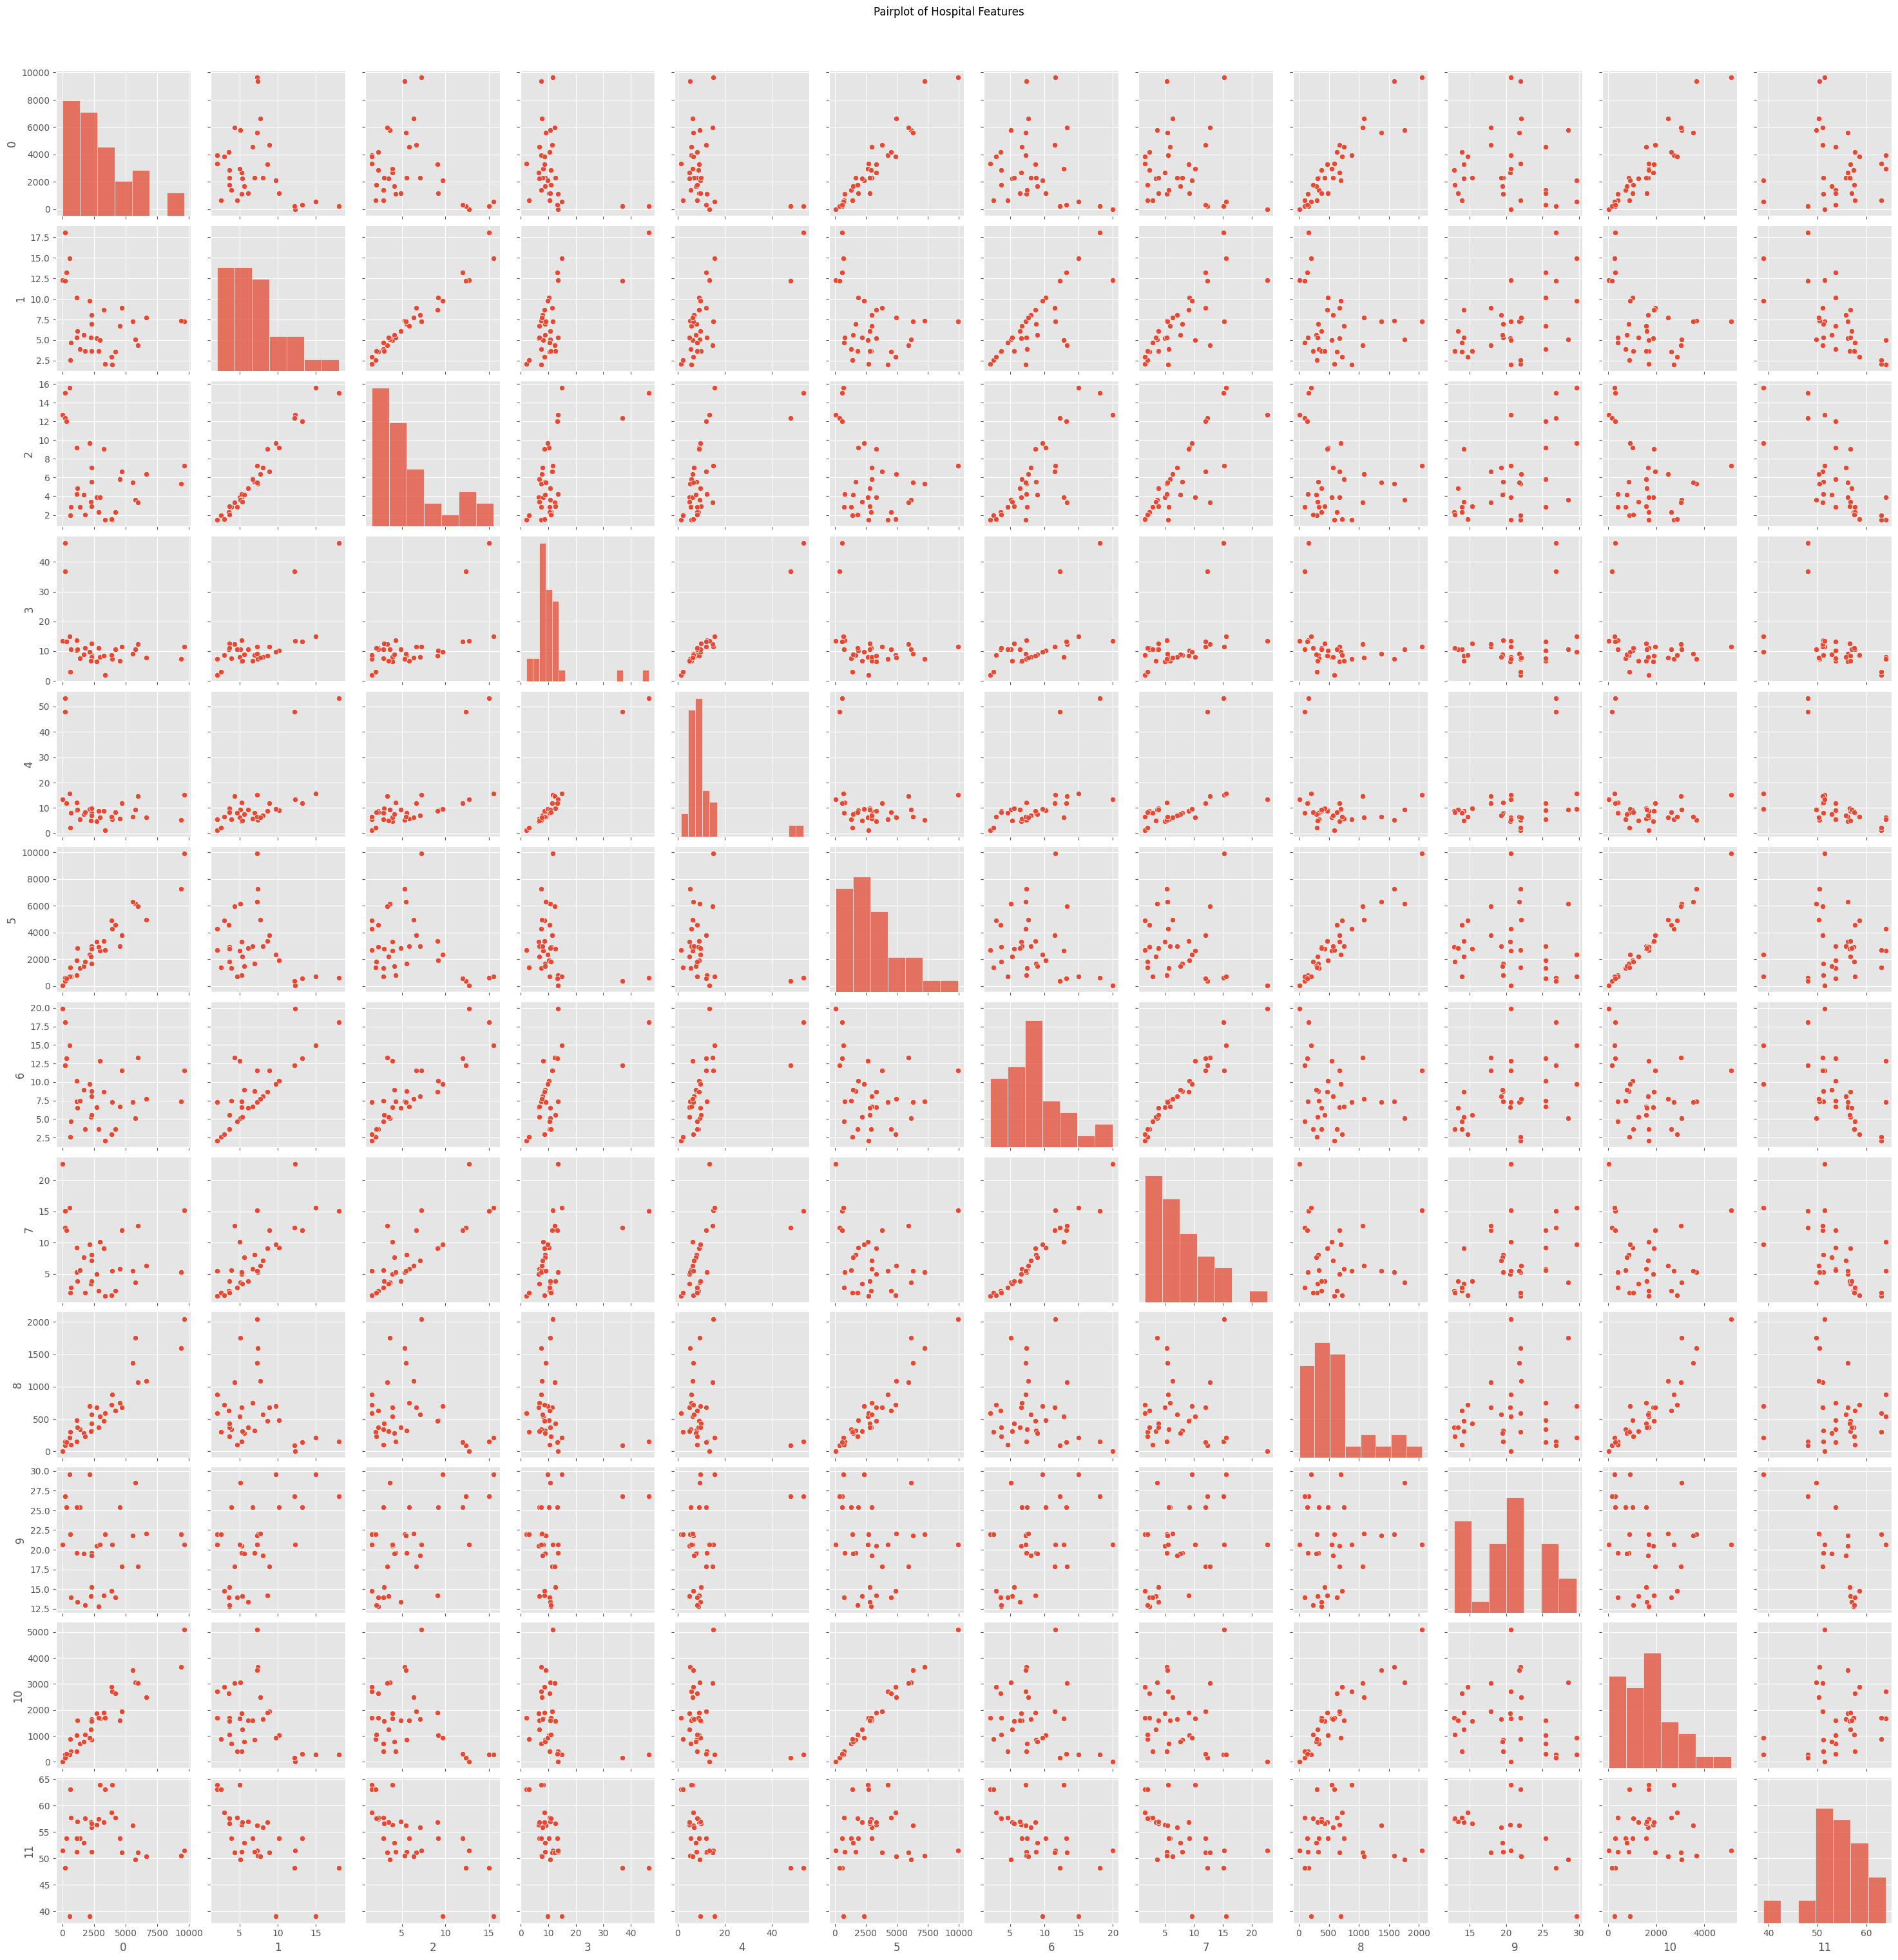

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a temporary DataFrame with column names as indices
hosp_data_num_indexed = hosp_data_num.copy()
hosp_data_num_indexed.columns = range(hosp_data_num.shape[1])

# Plot the pairplot
sns.pairplot(hosp_data_num_indexed)
plt.suptitle('Pairplot of Hospital Features', y=1.02)
plt.show()


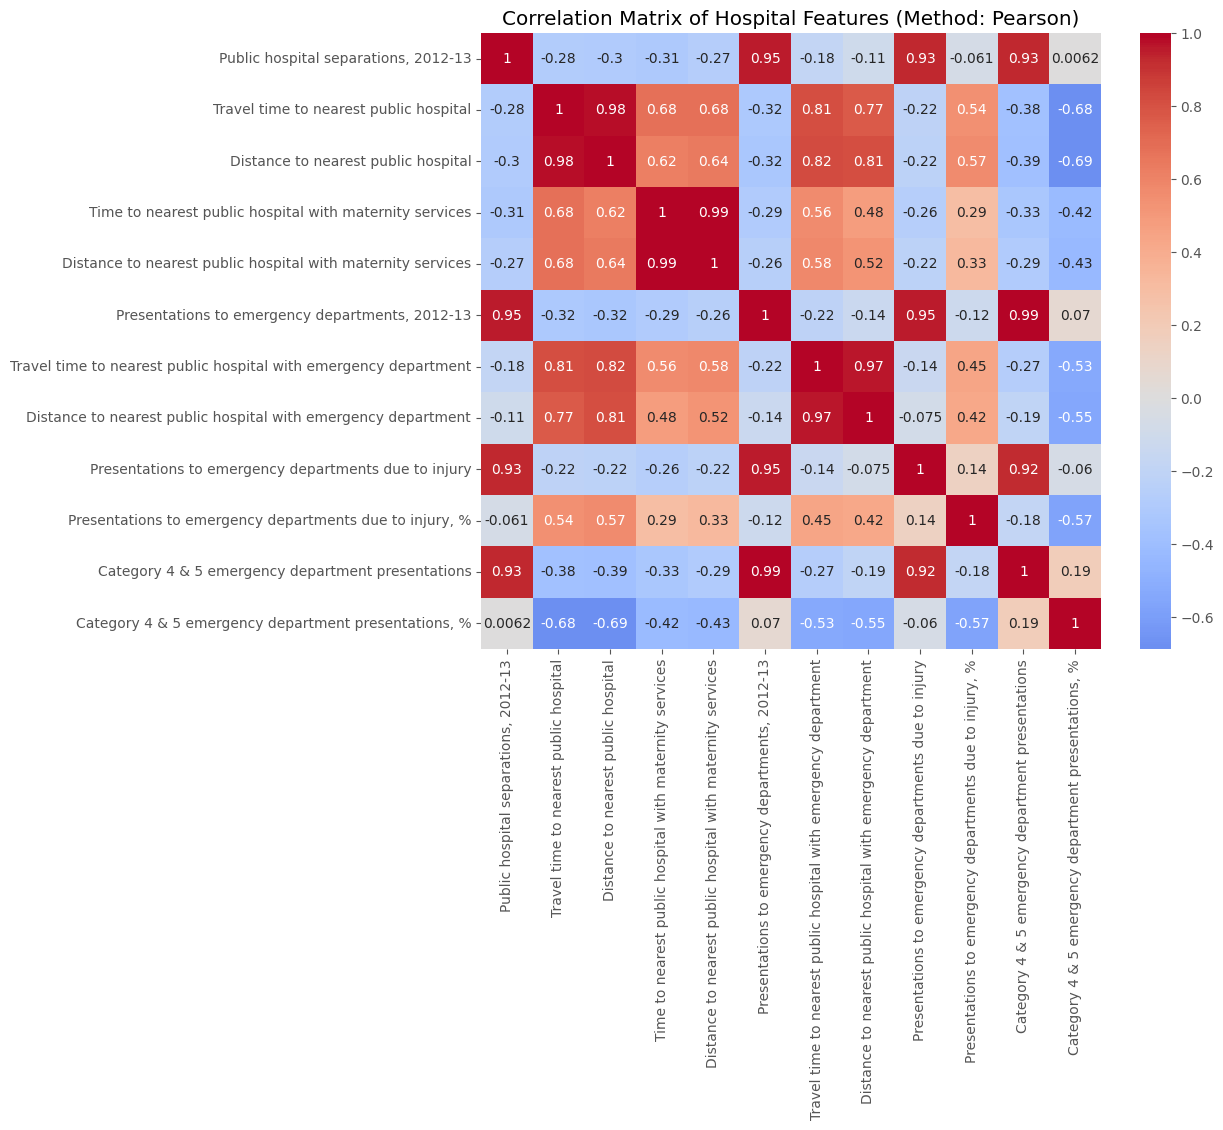

,"Public hospital separations, 2012-13",Travel time to nearest public hospital,Distance to nearest public hospital,Time to nearest public hospital with maternity services,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %"
"Public hospital separations, 2012-13",1.000000,-0.280999,-0.297792,-0.309253,-0.268991,0.951576,-0.179571,-0.106056,0.928385,-0.061281,0.929687,0.006192
Travel time to nearest public hospital,-0.280999,1.000000,0.979365,0.679515,0.681723,-0.316330,0.809240,0.768597,-0.215571,0.542420,-0.381187,-0.678227
Distance to nearest public hospital,-0.297792,0.979365,1.000000,0.624077,0.643372,-0.324671,0.819130,0.811685,-0.222962,0.567203,-0.387802,-0.686879
Time to nearest public hospital with maternity services,-0.309253,0.679515,0.624077,1.000000,0.988001,-0.294531,0.564466,0.475482,-0.264650,0.290310,-0.325636,-0.418203
Distance to nearest public hospital with maternity services,-0.268991,0.681723,0.643372,0.988001,1.000000,-0.257039,0.583785,0.519523,-0.223441,0.327773,-0.291896,-0.434492
"Presentations to emergency departments, 2012-13",0.951576,-0.316330,-0.324671,-0.294531,-0.257039,1.000000,-0.215870,-0.136823,0.951429,-0.120916,0.990814,0.069890
Travel time to nearest public hospital with emergency department,-0.179571,0.809240,0.819130,0.564466,0.583785,-0.215870,1.000000,0.966960,-0.144877,0.445099,-0.266833,-0.533516
Distance to nearest public hospital with emergency department,-0.106056,0.768597,0.811685,0.475482,0.519523,-0.136823,0.966960,1.000000,-0.075011,0.424177,-0.192743,-0.549388
Presentations to emergency departments due to injury,0.928385,-0.215571,-0.222962,-0.264650,-0.223441,0.951429,-0.144877,-0.075011,1.000000,0.144016,0.922633,-0.059652
"Presentations to emergency departments due to injury, %",-0.061281,0.542420,0.567203,0.290310,0.327773,-0.120916,0.445099,0.424177,0.144016,1.000000,-0.183231,-0.573623


In [35]:
# Create a correlation matrix
corr_matrix = hosp_data_num.corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
# set font size	
plt.title('Correlation Matrix of Hospital Features (Method: Pearson)')
plt.show()

hosp_data_num.corr()

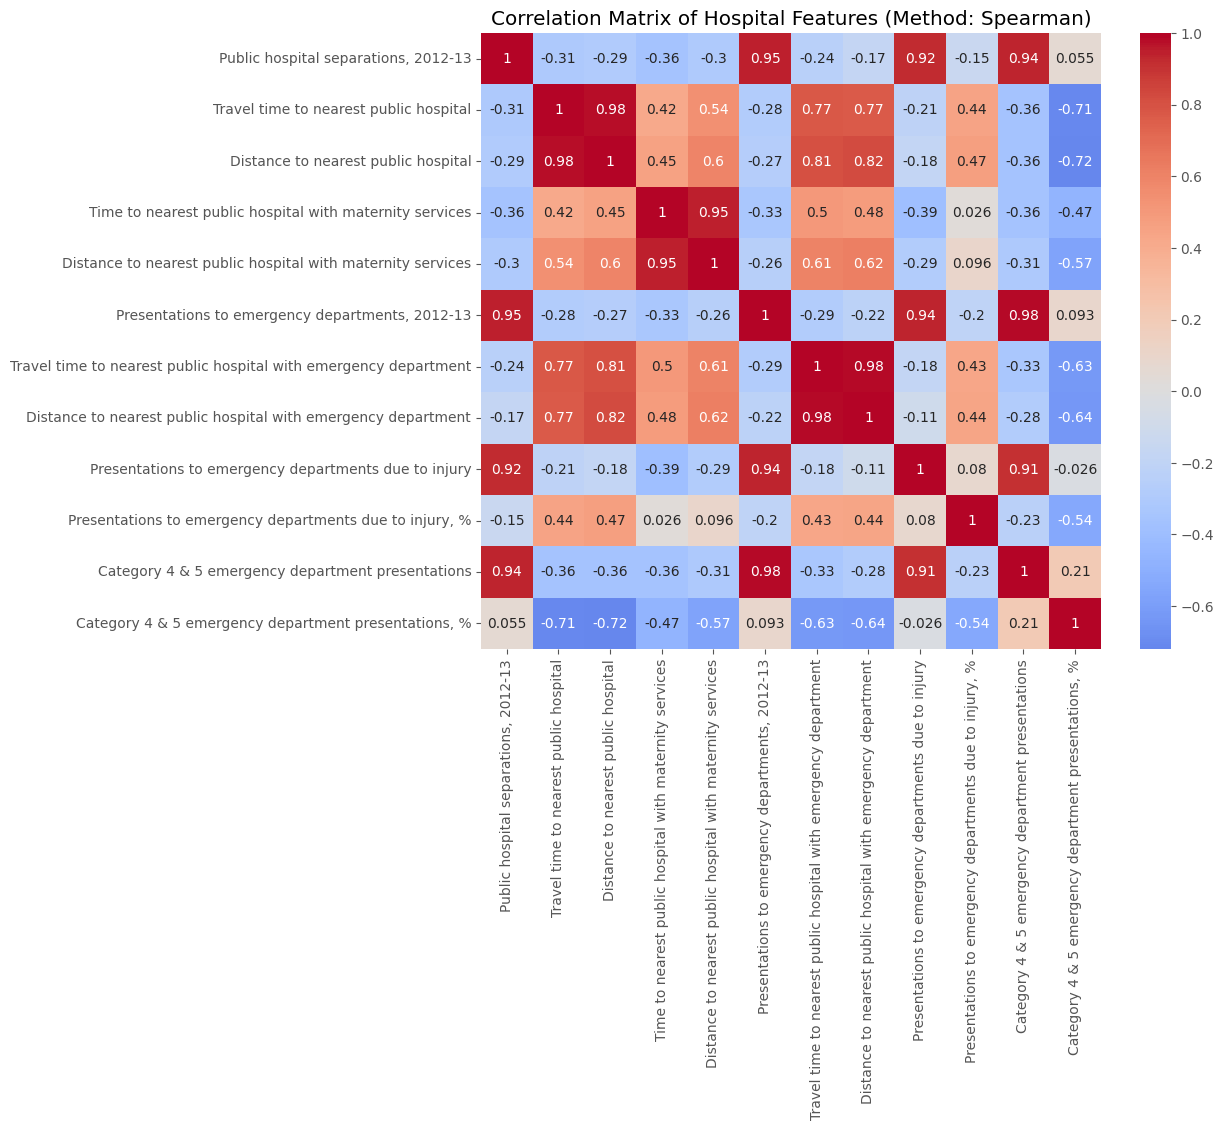

,"Public hospital separations, 2012-13",Travel time to nearest public hospital,Distance to nearest public hospital,Time to nearest public hospital with maternity services,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %"
"Public hospital separations, 2012-13",1.000000,-0.308174,-0.292895,-0.360122,-0.298090,0.948052,-0.243697,-0.174026,0.921772,-0.146218,0.936746,0.055462
Travel time to nearest public hospital,-0.308174,1.000000,0.977693,0.418487,0.540107,-0.280672,0.772040,0.766234,-0.210084,0.443239,-0.361650,-0.712758
Distance to nearest public hospital,-0.292895,0.977693,1.000000,0.453018,0.595722,-0.266616,0.808098,0.823988,-0.182888,0.473797,-0.359511,-0.720092
Time to nearest public hospital with maternity services,-0.360122,0.418487,0.453018,1.000000,0.951719,-0.331398,0.499160,0.484186,-0.394652,0.026127,-0.359817,-0.466463
Distance to nearest public hospital with maternity services,-0.298090,0.540107,0.595722,0.951719,1.000000,-0.255309,0.608862,0.623529,-0.288312,0.095798,-0.306341,-0.568526
"Presentations to emergency departments, 2012-13",0.948052,-0.280672,-0.266616,-0.331398,-0.255309,1.000000,-0.288923,-0.220779,0.939496,-0.203972,0.981665,0.092743
Travel time to nearest public hospital with emergency department,-0.243697,0.772040,0.808098,0.499160,0.608862,-0.288923,1.000000,0.980749,-0.182582,0.428877,-0.332315,-0.627502
Distance to nearest public hospital with emergency department,-0.174026,0.766234,0.823988,0.484186,0.623529,-0.220779,0.980749,1.000000,-0.108327,0.439878,-0.277617,-0.635752
Presentations to emergency departments due to injury,0.921772,-0.210084,-0.182888,-0.394652,-0.288312,0.939496,-0.182582,-0.108327,1.000000,0.080214,0.911994,-0.026432
"Presentations to emergency departments due to injury, %",-0.146218,0.443239,0.473797,0.026127,0.095798,-0.203972,0.428877,0.439878,0.080214,1.000000,-0.232697,-0.544996


In [36]:
# Create a correlation matrix
corr_matrix = hosp_data_num.corr(method='spearman')
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
# set font size	
plt.title('Correlation Matrix of Hospital Features (Method: Spearman)')
plt.show()

hosp_data_num.corr(method='spearman')

In [37]:
# build a GWR model to predict 'Category 4 & 5 emergency department presentations, %' using 'Distance to nearest public hospital with emergency department' 
# modules are already imported

# Create a DataFrame with the dependent and independent variables
df = pd.DataFrame({
	'Category_4_5_emergency_department_presentations': data['Category 4 & 5 emergency department presentations, %'],
	'Distance_to_nearest_public_hospital': data['Distance to nearest public hospital with emergency department']
})


X=df['Distance_to_nearest_public_hospital'].values.reshape(-1,1)
y=df['Category_4_5_emergency_department_presentations'].values.reshape(-1,1)


# Fit a GWR model
coords = np.array(list(zip(data['cart_x'], data['cart_y'])))
# bw = 8  # Bandwidth parameter
# gwr_model = GWR(coords, y,X, bw)
# # gwr_model = GWR(coords, y,X, bw)
# gwr_results = gwr_model.fit()

# # Print the summary
# print(gwr_results.summary())


Overall Validation Error (MSE): 17.638194283963937


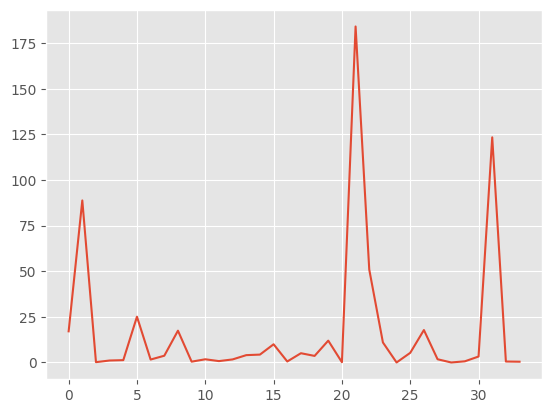

In [38]:
# from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

# Initialize an empty list to store prediction errors
errors = []

# Perform Leave-One-Out Cross-Validation
for i in range(len(df)):
    # Create a mask for the training data (exclude the i-th point)
    mask = np.arange(len(df)) != i
    coords_train = coords[mask]
    y_train = y[mask]
    X_train = X[mask]

    # Leave out the i-th point as the test data
    coords_test = coords[i].reshape(1, -1)
    X_test = X[i].reshape(1, -1)

    # Fit the GWR model on the training data
    gwr_model = GWR(coords_train, y_train, X_train, bw)
    gwr_results = gwr_model.fit()

    # Find the three closest training points to the left-out test point
    nbrs = NearestNeighbors(n_neighbors=3).fit(coords_train)
    distances, indices = nbrs.kneighbors(coords_test)

    # Get the parameters (coefficients) for the three closest points
    closest_params = gwr_results.params[indices.flatten()]  # Local parameters for the closest points

    # Calculate the predicted value for the left-out point
    # Averaging the coefficients from the three closest points
    avg_params = np.mean(closest_params, axis=0)
    
    # Ensure that avg_params has the correct shape for the dot product
    if avg_params.ndim == 1:  # If it's a 1D array, reshape it to be a 2D row vector
        avg_params = avg_params.reshape(1, -1)

    # Calculate the predicted value using the average coefficients
    predicted_value = avg_params[0,1]*X_test[0][0] + avg_params[0,0]  # y = b1*X + b0

    # Calculate the error (squared difference) and store it
    errors.append((y[i] - predicted_value.flatten()[0]) ** 2)  # Use flatten to get a scalar

# Calculate the overall validation error (Mean Squared Error)
overall_validation_error = np.mean(errors)
print("Overall Validation Error (MSE):", overall_validation_error)
# plot the errors
plt.plot(errors)
plt.show()

Average Relative Percentage Error: 5.650874978487025 %


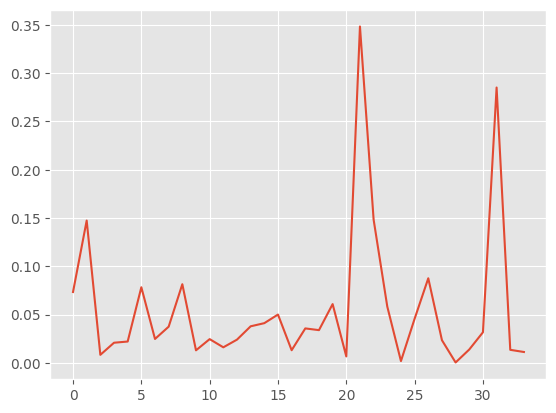

In [39]:

# compute relative error from the squared errors
relative_errors = np.sqrt(errors)/y
print('Average Relative Percentage Error:', np.mean(relative_errors)*100, '%')
# plot the relative errors
plt.plot(relative_errors)
plt.show()



In [40]:
# retrain the GWR model using the entire dataset
# Fit a GWR model
bw = 8  # Bandwidth parameter
gwr_model = GWR(coords, y,X, bw)
gwr_results = gwr_model.fit()

# Print the summary
print(gwr_results.summary())


Model type                                                         Gaussian
Number of observations:                                                  34
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            762.739
Log-likelihood:                                                    -101.123
AIC:                                                                206.247
AICc:                                                               209.047
BIC:                                                                649.895
R2:                                                                   0.302
Adj. R2:                                                              0.280

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

Percentage of Coefficients < 0: 76.47058823529412 %


<Figure size 1000x500 with 0 Axes>

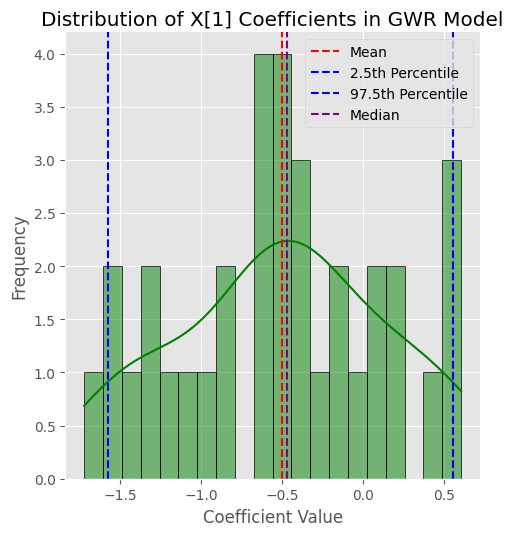

25    Springvale
1      Braybrook
14    Noble Park
3        Croydon
32     Waterways
12    Mordialloc
22      Sorrento
10       Mentone
Name: Community Name, dtype: object
16            Northcote
30               Toorak
27        St Kilda East
8               Malvern
20              Prahran
28             St Kilda
17            Parkville
18    Pascoe Vale South
4               Fawkner
15      North Melbourne
24          South Yarra
33              Windsor
29        St Kilda West
7          Malvern East
6               Glenroy
19       Port Melbourne
11            Moorabbin
0            Ascot Vale
9     Melbourne Airport
21           Somerville
23      South Melbourne
31                Tyabb
13          Murrumbeena
2           Craigieburn
5             Footscray
26     St Andrews Beach
Name: Community Name, dtype: object


In [45]:
# plot the distribtution of the parameters
# print % of coefficients that are <0
print('Percentage of Coefficients < 0:', np.mean(gwr_results.params[:,1] < 0)*100, '%')
plt.figure(figsize=(10, 5))
sns.displot(gwr_results.params[:,1], bins=20, color='green', edgecolor='black', kde=True)
# show the mean value, 95% confidence interval, and median
plt.axvline(x=np.mean(gwr_results.params[:,1]), color='red', linestyle='--', label='Mean')
plt.axvline(x=np.percentile(gwr_results.params[:,1], 2.5), color='blue', linestyle='--', label='2.5th Percentile')
plt.axvline(x=np.percentile(gwr_results.params[:,1], 97.5), color='blue', linestyle='--', label='97.5th Percentile')
plt.axvline(x=np.median(gwr_results.params[:,1]), color='purple', linestyle='--', label='Median')
plt.legend()
plt.title('Distribution of X[1] Coefficients in GWR Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.show()

# identify the top 5% +ve and -ve coefficients
# Sort the coefficients in descending order
sorted_indices_des = np.argsort(gwr_results.params[:,1])[::-1]
sorted_indices_asc = np.argsort(gwr_results.params[:,1])

# print the ones that have +ve coefficient for x1
positive_indices = sorted_indices_des[gwr_results.params[sorted_indices_des,1] > 0]


print(data.iloc[positive_indices[:]]['Community Name'])

# print the ones that have -ve coefficient for x1
negative_indices = sorted_indices_asc[gwr_results.params[sorted_indices_asc,1] < 0]
print(data.iloc[negative_indices[:]]['Community Name'])






In [42]:
# print the values of the coefficients in positive_indices[:5]
print(gwr_results.params[positive_indices[:5],1])

# print the values of the coefficients in negative_indices[:5]
print(gwr_results.params[negative_indices[:5],1])

print(gwr_results.params[17,1])


[0.60430143 0.54183459 0.52525463 0.45160022 0.23771508]
[-1.72109023 -1.54450574 -1.53969628 -1.44745039 -1.30547464]
-1.2168842673947349


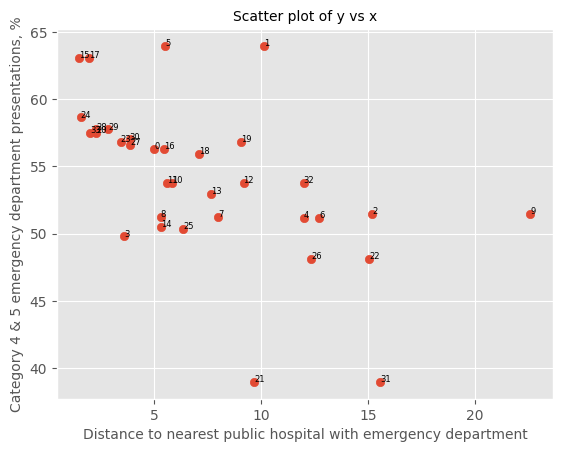

In [43]:
# scatter plot for y vs x
plt.scatter(X, y)
# set font size
plt.rcParams.update({'font.size': 10})
plt.xlabel('Distance to nearest public hospital with emergency department',fontsize=10)
plt.ylabel('Category 4 & 5 emergency department presentations, %',fontsize=10)
plt.title('Scatter plot of y vs x',fontsize=10)
# annotate the points
for i in range(len(X)):
	plt.annotate(i, (X[i], y[i]), textcoords="offset points", xytext=(0,0), fontsize=6)
plt.show()

In [44]:
# test moran's I for the residuals
# Compute the residuals
residuals = y - gwr_results.predy

# Compute Moran's I for the residuals
moran_residuals = Moran(residuals.flatten(), w)
print("Moran's I for the residuals:", moran_residuals.I)
# print p-value
print("p-value:", moran_residuals.p_sim)

Moran's I for the residuals: -0.10250922524100146
p-value: 0.096
